Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:
<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Remarks: </b> if I can give some recommendations
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* Thank you for this work. It was interesting to check. 
* While there's room for improvement, on the whole, your project is impressive/looking good.
* I like the way you've done hypotheses testing in your project.
* There are a couple of things that need to be done before your project can be accepted, but they're pretty straightforward.
* There are also some comments for improvement. They don’t mean that you’ve done anything wrong, but they’re things we wanted to point out that can help you further develop your skills.
* We are waiting for the corrected project. Good luck!

### <font color='orange'>General feedback (review 2)</font>
* I really appreciate the corrections you sent in! Thanks for taking the time to do so.
* There are still minor issues. There are a few more pointers to help you put the final touches on your project. You can find them by keyword 'review 2'.
* Ыгиьше the project as soon as the fixes are ready.

## Step 1. Open the data file and have a look at the general information. 

## Important
## - I dont konw how to manage statistically some null values 
## - I am not consious of the churn_on column and if i have manage it correctly
## - I am not so sure of the function generated to calculate the monthly beneficts from users. 

In [102]:
import pandas as pd
calls= pd.read_csv('/datasets/megaline_calls.csv')
internet= pd.read_csv('/datasets/megaline_internet.csv')
messages= pd.read_csv('/datasets/megaline_messages.csv')
plans= pd.read_csv('/datasets/megaline_plans.csv')
users= pd.read_csv('/datasets/megaline_users.csv')

In [103]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [104]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [105]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [106]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [107]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Conclusion

## Note that most of the columns of the differents dataset are an objetct type and must be replaced by a datetime format. The users data present one column 'churn_date' that has not many non-null values, indeed, there are many mising values.

## Step 2. Prepare the data. 

### Convert Convert the data to the necessary types

Datetime format

In [108]:
calls['call_date']= pd.to_datetime(calls['call_date'], format= '%Y-%m-%d')
internet['session_date']= pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')
messages['message_date']= pd.to_datetime(messages['message_date'], format= '%Y-%m-%d')
users['reg_date']= pd.to_datetime(users['reg_date'], format= '%Y-%m-%d')


In [109]:
users['churn_date']= pd.to_datetime(users['churn_date'], format= '%Y-%m-%d')

id columns

In [110]:
calls['id']= calls['id'].astype('int')
internet['id']= internet['id'].astype('int')
messages['id']= messages['id'].astype('int')

<div class="alert alert-block alert-success">
<b>Success:</b> This part was done good.
</div>

<div class="alert alert-block alert-info">
<b>Remarks: </b> Be careful while changing type of id column. It contain underline.
</div>

### Find and eliminate errors in the data

In [111]:
calls.isna().mean()

id           0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64

In [112]:
calls[calls['duration']==0]['duration'].count()

26834

In [113]:
calls[calls['duration']==0]['duration'].count()/len(calls)

0.1948233927469416

In [114]:
internet.isna().mean()

id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
dtype: float64

In [115]:
messages.isna().mean()

id              0.0
user_id         0.0
message_date    0.0
dtype: float64

In [116]:
plans.isna().mean()

messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
usd_monthly_pay          0.0
usd_per_gb               0.0
usd_per_message          0.0
usd_per_minute           0.0
plan_name                0.0
dtype: float64

In [117]:
users.isna().mean()

user_id       0.000
first_name    0.000
last_name     0.000
age           0.000
city          0.000
reg_date      0.000
tariff        0.000
churn_date    0.932
dtype: float64

In [118]:
users[users['churn_date'].isna()==False]

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


<div class="alert alert-block alert-info">
<b>Remarks: </b> You can use <span style="font-family: monospace"> .notna() </span> in this case.
</div>

We sholud check if it is active or not (churn_date)

In [119]:
filter_use= users[users['churn_date'].notnull()]["user_id"].tolist()
internet = internet[~internet.user_id.isin(filter_use)]
calls = calls[~calls.user_id.isin(filter_use)]

## Conclusion

## All these datasets present dates and must be converted to a datetime type if we want to work with them. Also, all the id columns from different datasets has been changed to a integer type and then we can work easily with them. The churn_on date present too many missing values. it is better to avoid it so we filter data thus allow us manage useful data. 


<div class="alert alert-block alert-info">
<b>Remarks: </b> The best solution is to check if users really churned after churn_date. Then just left this column with NaNs as it is. It means that users have not churned yet.
</div>

### Number of calls made and minutes used per month

In [120]:
calls['call_month']= calls['call_date'].values.astype('datetime64[M]')
messages['message_month']= messages['message_date'].values.astype('datetime64[M]')
internet['internet_month']= internet['session_date'].values.astype('datetime64[M]')



In [121]:
call= calls.pivot_table(index=['call_month','user_id'], values= ['duration', 'id'], aggfunc=['sum', 'count']).reset_index()
call.columns=['month', 'user_id','duration_min','calls_y','duration_y', 'calls']
del call['duration_y']
del call['calls_y']
call

,month,user_id,duration_min,calls
0,2018-01-01,1042,106.83,18
1,2018-01-01,1077,275.07,42
2,2018-01-01,1185,170.29,23
3,2018-01-01,1196,272.56,42
4,2018-01-01,1214,14.73,5
...,...,...,...,...
2095,2018-12-01,1495,467.47,65
2096,2018-12-01,1496,278.61,40
2097,2018-12-01,1497,276.53,54
2098,2018-12-01,1498,324.77,39


### The number of text messages sent per month

In [122]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             76051 non-null  int64         
 1   user_id        76051 non-null  int64         
 2   message_date   76051 non-null  datetime64[ns]
 3   message_month  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 2.3 MB


In [123]:
mess= messages.pivot_table(index=['message_month','user_id'], values='id', aggfunc='count').reset_index()
mess.columns=['month','user_id', 'messages']
mess

,month,user_id,messages
0,2018-01-01,1077,37
1,2018-01-01,1196,23
2,2018-01-01,1214,2
3,2018-01-01,1362,21
4,2018-02-01,1028,12
...,...,...,...
1801,2018-12-01,1491,43
1802,2018-12-01,1492,37
1803,2018-12-01,1494,33
1804,2018-12-01,1496,11


### Volume of data per month

In [124]:
print('Number of total calls: ',len(calls['id']))
print('Number of total messages:',len(messages['id']))
print('Number of total entries:',len(internet['id']))


Number of total calls:  128736
Number of total messages: 76051
Number of total entries: 97359


In [125]:
inter= internet.pivot_table(index=['internet_month','user_id'], values=['id', 'mb_used'], aggfunc=['sum','count']).reset_index()
inter.columns=['month', 'user_id','entries_x', 'mb','id', 'mb_x']
del inter['entries_x']
del inter['mb_x']

inter

,month,user_id,mb,id
0,2018-01-01,1042,1854.93,8
1,2018-01-01,1077,10635.64,22
2,2018-01-01,1185,6812.77,25
3,2018-01-01,1196,8908.61,15
4,2018-01-01,1214,1315.35,4
...,...,...,...,...
2115,2018-12-01,1495,24097.40,71
2116,2018-12-01,1496,16438.99,53
2117,2018-12-01,1497,11106.55,31
2118,2018-12-01,1498,23137.69,65


When I merge all the datasets, I used 'outer' to include all the information and to keep all the information


In [126]:
form= call.merge(mess, on=['month', 'user_id'], how='outer')
resume= form.merge(inter, on=['month', 'user_id'],how='outer')
resume

,month,user_id,duration_min,calls,messages,mb,id
0,2018-01-01,1042,106.83,18.0,NaN,1854.93,8.0
1,2018-01-01,1077,275.07,42.0,37.0,10635.64,22.0
2,2018-01-01,1185,170.29,23.0,NaN,6812.77,25.0
3,2018-01-01,1196,272.56,42.0,23.0,8908.61,15.0
4,2018-01-01,1214,14.73,5.0,2.0,1315.35,4.0
...,...,...,...,...,...,...,...
2249,2018-12-01,1466,NaN,NaN,41.0,NaN,NaN
2250,2018-12-01,1467,NaN,NaN,77.0,NaN,NaN
2251,2018-12-01,1491,NaN,NaN,43.0,NaN,NaN
2252,2018-06-01,1311,NaN,NaN,NaN,1498.83,9.0


In [127]:
resume.isna().mean()

month           0.000000
user_id         0.000000
duration_min    0.068323
calls           0.068323
messages        0.198758
mb              0.059450
id              0.059450
dtype: float64

In [128]:
import numpy as np
resume['duration_min']=np.ceil(resume['duration_min'])
resume['mb']= np.ceil(resume['mb'])
resume['duration_min']

0       107.0
1       276.0
2       171.0
3       273.0
4        15.0
        ...  
2249      NaN
2250      NaN
2251      NaN
2252      NaN
2253      NaN
Name: duration_min, Length: 2254, dtype: float64

In [129]:
resume['total_data']= resume['calls']+resume['messages']+resume['id']
tab=resume.pivot_table(index='month', values=['duration_min', 'calls', 'messages', 'mb', 'id','total_data'], aggfunc='sum')
tab

,calls,duration_min,id,mb,messages,total_data
month,,,,,,
2018-01-01,172.0,1121.0,96.0,37424.0,83.0,277.0
2018-02-01,690.0,4613.0,539.0,209426.0,259.0,993.0
2018-03-01,1495.0,9881.0,1235.0,489785.0,594.0,2492.0
2018-04-01,3215.0,21846.0,2372.0,871304.0,1333.0,5210.0
2018-05-01,5349.0,36149.0,3820.0,1405331.0,2780.0,9256.0
2018-06-01,7553.0,51709.0,5491.0,2021083.0,3833.0,13210.0
2018-07-01,10357.0,70276.0,7512.0,2814820.0,5208.0,18377.0
2018-08-01,12742.0,85218.0,10013.0,3754601.0,7394.0,24525.0
2018-09-01,15505.0,104674.0,11855.0,4392682.0,9227.0,29830.0


## Conclusion

## We have to merge all the dataset into a new dataset that recopilates all the esential innformation about the customers and make future conclusions. We obtain the dates from each source of information and then create a cronology of when was used all this data. The outer type of merging maintains all the necesary information about the registration dates of calls, messages and megas used.

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> OK, a tiny issue here, but it's easy to fix. Don't forget that there are different types of merging (left, inner, ...). The default type is inner. Is it appropriate here. Some good explanations <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html"> here </a>.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing (review 2):</b> If you use <span style="font-family: monospace"> how=inner </span> than you lose month in which for example user don't make any calls. The best way to understand is to try all possible values of how parameter on a "toy example".
</div>

Thannks for the example you explain here :)

In [130]:
import pandas as pd

df1 = pd.DataFrame([['apple', 10], ['banana', 23], ['apricot', 40]], 
                   columns=['name', 'ammount'])
df2 = pd.DataFrame([['кaspberry', 23], ['banana', 23], ['apricot', 40]], 
                   columns=['name', 'ammount'])

print('df1:')
display(df1)

print('df2:')
display(df2)

df1.merge(df2, on='name', how='outer')

df1:


,name,ammount
0,apple,10
1,banana,23
2,apricot,40


df2:


,name,ammount
0,кaspberry,23
1,banana,23
2,apricot,40


,name,ammount_x,ammount_y
0,apple,10.0,NaN
1,banana,23.0,23.0
2,apricot,40.0,40.0
3,кaspberry,NaN,23.0


<div class="alert alert-block alert-danger">
<b>Toy example end (review 2).</b> 
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Don't forget that Megaline always rounds up to the nearest minute and megabyte. If the call lasted just one second, it will be counted as one minute.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing (review 2):</b> In this task you need to use ceil before aggregating by month.
</div>

### The monthly profit from each user 

In [131]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [132]:
users

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


we merge all the information to this new table that will be our reference 

In [133]:
group_table=resume.merge(users, on='user_id',how='left')
group_table

,month,user_id,duration_min,calls,messages,mb,id,total_data,first_name,last_name,age,city,reg_date,tariff,churn_date
0,2018-01-01,1042,107.0,18.0,NaN,1855.0,8.0,NaN,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,NaT
1,2018-01-01,1077,276.0,42.0,37.0,10636.0,22.0,101.0,Chau,Webster,23,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-01-14,ultimate,NaT
2,2018-01-01,1185,171.0,23.0,NaN,6813.0,25.0,NaN,Loria,Freeman,47,"Louisville/Jefferson County, KY-IN MSA",2018-01-14,ultimate,NaT
3,2018-01-01,1196,273.0,42.0,23.0,8909.0,15.0,80.0,Noel,Dawson,46,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-14,ultimate,NaT
4,2018-01-01,1214,15.0,5.0,2.0,1316.0,4.0,11.0,Emil,Robles,34,"San Francisco-Oakland-Berkeley, CA MSA",2018-01-01,ultimate,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,2018-12-01,1466,NaN,NaN,41.0,NaN,NaN,NaN,Alphonse,Harmon,56,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-26,surf,2018-09-17
2250,2018-12-01,1467,NaN,NaN,77.0,NaN,NaN,NaN,Nickolas,Deleon,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-01-31,ultimate,2018-11-18
2251,2018-12-01,1491,NaN,NaN,43.0,NaN,NaN,NaN,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18
2252,2018-06-01,1311,NaN,NaN,NaN,1499.0,9.0,NaN,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",2018-06-27,ultimate,NaT


In [134]:
group_table['tariff'].value_counts()

surf        1544
ultimate     710
Name: tariff, dtype: int64

I'm gonna extract the proportional part of the monthly charge depending on the plan choosed

In [135]:
pd.date_range(group_table['reg_date'].min(), group_table['reg_date'].max(),freq='MS')

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> There is no need to calculate proportion. You can assume that if the user makes a call (message/internet) than he pays 20 (or 70) USD this month.
</div>

lets create a function that calculate the beneficts generated which depends on the type plan choosen and extarct the package limit from the diffeent sources

In [136]:
user_info=group_table.groupby(['month', 'tariff','user_id'])[['duration_min','messages', 'mb','total_data']].sum().reset_index()

In [137]:
def month_tariff(row):
    if row=='surf':
        return 20
    if row=='ultimate':
        return 70

In [138]:
user_info['monthly_tariff']= user_info['tariff'].apply(month_tariff)
user_info

,month,tariff,user_id,duration_min,messages,mb,total_data,monthly_tariff
0,2018-01-01,surf,1042,107.0,0.0,1855.0,0.0,20
1,2018-01-01,surf,1362,279.0,21.0,7895.0,85.0,20
2,2018-01-01,ultimate,1077,276.0,37.0,10636.0,101.0,70
3,2018-01-01,ultimate,1185,171.0,0.0,6813.0,0.0,70
4,2018-01-01,ultimate,1196,273.0,23.0,8909.0,80.0,70
...,...,...,...,...,...,...,...,...
2249,2018-12-01,ultimate,1482,54.0,5.0,561.0,11.0,70
2250,2018-12-01,ultimate,1487,393.0,66.0,13993.0,171.0,70
2251,2018-12-01,ultimate,1490,348.0,0.0,46216.0,0.0,70
2252,2018-12-01,ultimate,1493,447.0,0.0,15290.0,0.0,70


i thought this function will be more helpfull to undesrtand the calculations. keep in mind that it onlly returns 0 or postive values as a part of the extra cost.

In [139]:
def extra_package(row):
    call=row['duration_min']
    message=row['messages']
    mb=row['mb']
    plan= row['tariff']
    if plan=='surf':
        minutes_s_over= max(0,call-500)
        messages_s_over= max(0,message-50)
        mb_s_over= max(0,mb-15360)
        profit_s=  minutes_s_over*0.03+messages_s_over*0.03+mb_s_over*10
        return profit_s
    
    if plan=='ultimate':
        minutes_u_over= max(0,call-3000)
        messages_u_over= max(0,message-1000)
        mb_u_over= max(0,mb-30720)
        profit_u= minutes_u_over*0.02+messages_u_over*0.01+mb_u_over*7
        return profit_u
    
            
        

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Firstly you need to calculate extra minutes/GB/messages of user. After that multiply these values on cost. The last step will be summarizing it with monthly tariff cost.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing (review 2):</b> Try to use only one (or two for each plan) return in the the function. Create a variable <span style="font-family: monospace"> profit </span> and add to it default plan profit, call profit, message profit, .... You can do it with the help of <span style="font-family: monospace"> if </span>.
</div>

In [140]:
user_info['profit_extra']= user_info[['duration_min','messages', 'mb', 'tariff']].apply(extra_package,axis=1)
user_info['total_profit']= user_info['monthly_tariff']+user_info['profit_extra']
user_info

,month,tariff,user_id,duration_min,messages,mb,total_data,monthly_tariff,profit_extra,total_profit
0,2018-01-01,surf,1042,107.0,0.0,1855.0,0.0,20,0.0,20.0
1,2018-01-01,surf,1362,279.0,21.0,7895.0,85.0,20,0.0,20.0
2,2018-01-01,ultimate,1077,276.0,37.0,10636.0,101.0,70,0.0,70.0
3,2018-01-01,ultimate,1185,171.0,0.0,6813.0,0.0,70,0.0,70.0
4,2018-01-01,ultimate,1196,273.0,23.0,8909.0,80.0,70,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...
2249,2018-12-01,ultimate,1482,54.0,5.0,561.0,11.0,70,0.0,70.0
2250,2018-12-01,ultimate,1487,393.0,66.0,13993.0,171.0,70,0.0,70.0
2251,2018-12-01,ultimate,1490,348.0,0.0,46216.0,0.0,70,108472.0,108542.0
2252,2018-12-01,ultimate,1493,447.0,0.0,15290.0,0.0,70,0.0,70.0


In [141]:
user_info.groupby(['tariff','month'])[['duration_min','messages', 'mb', 'total_profit']].sum()

duration_min  messages         mb  total_profit
tariff   month                                                      
surf     2018-01-01         386.0      21.0     9750.0         40.00
         2018-02-01        2532.0     108.0   109615.0     111548.34
         2018-03-01        7163.0     351.0   306957.0     542363.23
         2018-04-01       16403.0     870.0   584054.0     918772.93
         2018-05-01       26740.0    1849.0   986910.0    1806702.66
         2018-06-01       36931.0    2454.0  1368704.0    2253646.71
         2018-07-01       48518.0    3271.0  1916656.0    4457944.31
         2018-08-01       58985.0    4662.0  2563499.0    6159208.45
         2018-09-01       71428.0    5968.0  3013161.0    6137266.78
         2018-10-01       90363.0    8020.0  3838573.0    9139420.93
         2018-11-01      105053.0    9165.0  4295137.0    8956188.17
         2018-12-01      132995.0   12275.0  5372440.0   13278286.77
ultimate 2018-01-01         735.0      62.0    27674.0        280.00
         2018-02-01        2081.0     151.0    99811.0        490.00
         2018-03-01        2718.0     243.0   182828.0      39851.00
         2018-04-01        5443.0     463.0   287250.0      61005.00
         2018-05-01        9409.0     931.0   418421.0      17276.00
         2018-06-01       14778.0    1379.0   652379.0      74312.00
         2018-07-01       21758.0    1937.0   898164.0     115857.00
         2018-08-01       26233.0    2732.0  1191102.0     199773.00
         2018-09-01       33246.0    3259.0  1379521.0     165571.00
         2018-10-01       42919.0    4181.0  1765724.0     234416.00
         2018-11-01       50855.0    4903.0  2056257.0     217077.00
         2018-12-01       62067.0    6796.0  2611060.0     471681.00

## Conclusion

## There is in common in all of them, the users-id columns which help us to join all the information and follow the data used from each user. This is becasuse we want to calculate the monthly profits generated by each user among the year of 2018. Note that to calculate the profits we proportionally charge to each user how was his consumption and througth that calculate the benefits obtain from the registration date

## Step 3. Analyze the data

In [142]:
customer_month=user_info.groupby(['month', 'user_id'])[['duration_min', 'messages','mb', 'total_data']].sum()
customer_month

duration_min  messages       mb  total_data
month      user_id                                             
2018-01-01 1042            107.0       0.0   1855.0         0.0
           1077            276.0      37.0  10636.0       101.0
           1185            171.0       0.0   6813.0         0.0
           1196            273.0      23.0   8909.0        80.0
           1214             15.0       2.0   1316.0        11.0
...                          ...       ...      ...         ...
2018-12-01 1495            468.0       0.0  24098.0         0.0
           1496            279.0      11.0  16439.0       104.0
           1497            277.0      50.0  11107.0       135.0
           1498            325.0       0.0  23138.0         0.0
           1499            469.0       0.0  22060.0         0.0

[2254 rows x 4 columns]

In [143]:
stat_table=user_info.groupby(['tariff','month'])[['duration_min', 'messages','mb', 'total_data']].agg(['mean', 'std', 'var']).reset_index()
stat_table
stat_table.columns=['plan','month','duration_min_mean','duration_min_std','duration_min_var', 'messages_mean', 'messages_std', 'messages_var', 'mb_mean', 'mb_std', 'mb_var', 'total_data_mean','total_data_std','total_data_var']

<div class="alert alert-block alert-info">
<b>Remarks: </b> This table is equal to behaviour. Try to avoid duplicating.
</div>

In [144]:
stat_table

,plan,month,duration_min_mean,duration_min_std,duration_min_var,messages_mean,messages_std,messages_var,mb_mean,mb_std,mb_var,total_data_mean,total_data_std,total_data_var
0,surf,2018-01-01,193.000000,121.622366,14792.000000,10.500000,14.849242,220.500000,4875.000000,4270.924958,1.824080e+07,42.500000,60.104076,3612.500000
1,surf,2018-02-01,281.333333,216.846720,47022.500000,12.000000,19.646883,386.000000,12179.444444,6608.640937,4.367414e+07,52.111111,72.390339,5240.361111
2,surf,2018-03-01,311.434783,178.494417,31860.256917,15.260870,18.616262,346.565217,13345.956522,8261.047752,6.824491e+07,71.739130,70.092937,4913.019763
3,surf,2018-04-01,328.060000,220.233865,48502.955510,17.400000,22.396246,501.591837,11681.080000,8023.126476,6.437056e+07,74.020000,74.928671,5614.305714
4,surf,2018-05-01,356.533333,245.449633,60245.522523,24.653333,29.224894,854.094414,13158.800000,8510.976787,7.243673e+07,88.106667,84.917858,7211.042523
5,surf,2018-06-01,388.747368,221.418155,49025.999328,25.831579,30.339446,920.481971,14407.410526,7763.622735,6.027384e+07,93.021053,80.102724,6416.446361
6,surf,2018-07-01,407.714286,248.621186,61812.493947,27.487395,30.446359,926.980772,16106.352941,8763.045297,7.679096e+07,101.008403,83.684384,7003.076200
7,surf,2018-08-01,370.974843,230.250797,53015.429743,29.320755,32.140971,1033.042035,16122.635220,9192.823638,8.450801e+07,101.163522,82.331060,6778.403471
8,surf,2018-09-01,373.968586,217.822765,47446.756903,31.246073,31.693884,1004.502287,15775.712042,7744.666748,5.997986e+07,103.240838,78.310546,6132.541692
9,surf,2018-10-01,389.495690,230.896315,53313.108206,34.568966,35.745668,1277.752799,16545.573276,8589.235085,7.377496e+07,110.590517,84.468291,7134.892204


We will face data from different sources 

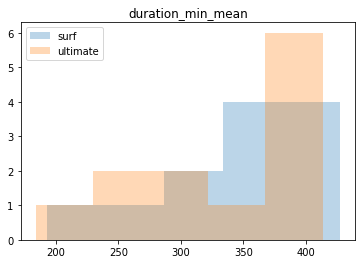

In [145]:
import matplotlib.pyplot as plt
s= stat_table[stat_table['plan']=='surf']['duration_min_mean']
u= stat_table[stat_table['plan']=='ultimate']['duration_min_mean']
plt.hist(s,alpha=0.3, bins=5, label='surf')
plt.hist(u,alpha=0.3, bins=5, label='ultimate')
plt.legend()
plt.title('duration_min_mean')
plt.show()

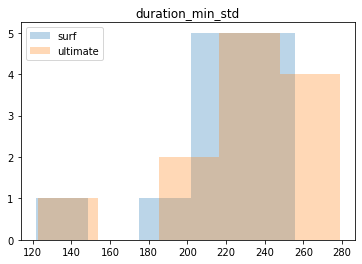

In [146]:
s= stat_table[stat_table['plan']=='surf']['duration_min_std']
u= stat_table[stat_table['plan']=='ultimate']['duration_min_std']
plt.hist(s,alpha=0.3, bins=5, label='surf')
plt.hist(u,alpha=0.3, bins=5, label='ultimate')
plt.legend()
plt.title('duration_min_std')
plt.show()

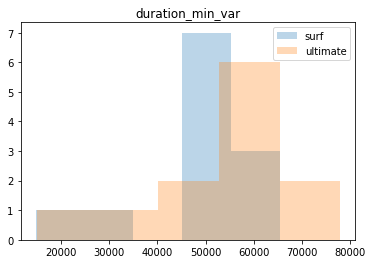

In [147]:
s= stat_table[stat_table['plan']=='surf']['duration_min_var']
u= stat_table[stat_table['plan']=='ultimate']['duration_min_var']
plt.hist(s,alpha=0.3, bins=5, label='surf')
plt.hist(u,alpha=0.3, bins=5, label='ultimate')
plt.legend()
plt.title('duration_min_var')
plt.show()

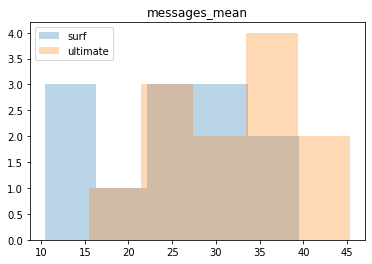

In [148]:
s= stat_table[stat_table['plan']=='surf']['messages_mean']
u= stat_table[stat_table['plan']=='ultimate']['messages_mean']
plt.hist(s,alpha=0.3, bins=5, label='surf')
plt.hist(u,alpha=0.3, bins=5, label='ultimate')
plt.legend()
plt.title('messages_mean')
plt.show()

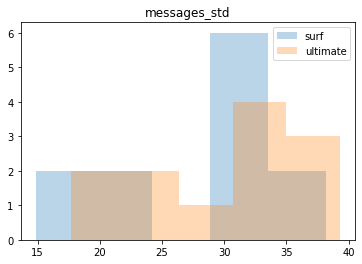

In [149]:
s= stat_table[stat_table['plan']=='surf']['messages_std']
u= stat_table[stat_table['plan']=='ultimate']['messages_std']
plt.hist(s,alpha=0.3, bins=5, label='surf')
plt.hist(u,alpha=0.3, bins=5, label='ultimate')
plt.legend()
plt.title('messages_std')
plt.show()

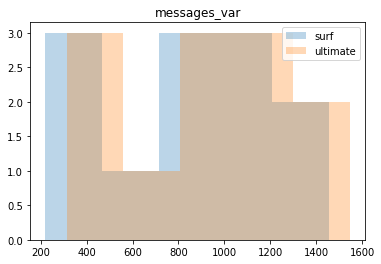

In [150]:
s= stat_table[stat_table['plan']=='surf']['messages_var']
u= stat_table[stat_table['plan']=='ultimate']['messages_var']
plt.hist(s,alpha=0.3, bins=5, label='surf')
plt.hist(u,alpha=0.3, bins=5, label='ultimate')
plt.legend()
plt.title('messages_var')
plt.show()

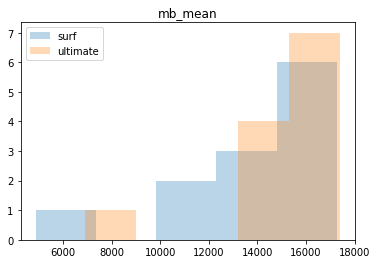

In [151]:
s= stat_table[stat_table['plan']=='surf']['mb_mean']
u= stat_table[stat_table['plan']=='ultimate']['mb_mean']
plt.hist(s,alpha=0.3, bins=5, label='surf')
plt.hist(u,alpha=0.3, bins=5, label='ultimate')
plt.legend()
plt.title('mb_mean')
plt.show()

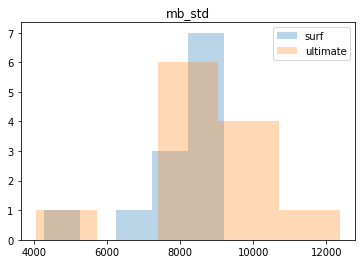

In [152]:
s= stat_table[stat_table['plan']=='surf']['mb_std']
u= stat_table[stat_table['plan']=='ultimate']['mb_std']
plt.hist(s,alpha=0.3, bins=5, label='surf')
plt.hist(u,alpha=0.3, bins=5, label='ultimate')
plt.legend()
plt.title('mb_std')
plt.show()

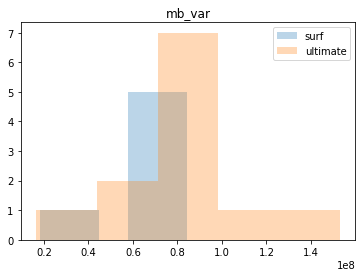

In [153]:
s= stat_table[stat_table['plan']=='surf']['mb_var']
u= stat_table[stat_table['plan']=='ultimate']['mb_var']
plt.hist(s,alpha=0.3, bins=5, label='surf')
plt.hist(u,alpha=0.3, bins=5, label='ultimate')
plt.legend()
plt.title('mb_var')
plt.show()

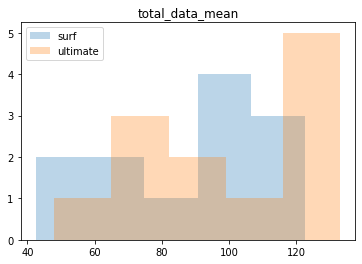

In [154]:
s= stat_table[stat_table['plan']=='surf']['total_data_mean']
u= stat_table[stat_table['plan']=='ultimate']['total_data_mean']
plt.hist(s,alpha=0.3, bins=5, label='surf')
plt.hist(u,alpha=0.3, bins=5, label='ultimate')
plt.legend()
plt.title('total_data_mean')
plt.show()

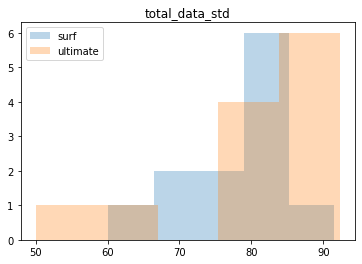

In [155]:
s= stat_table[stat_table['plan']=='surf']['total_data_std']
u= stat_table[stat_table['plan']=='ultimate']['total_data_std']
plt.hist(s,alpha=0.3, bins=5, label='surf')
plt.hist(u,alpha=0.3, bins=5, label='ultimate')
plt.legend()
plt.title('total_data_std')
plt.show()

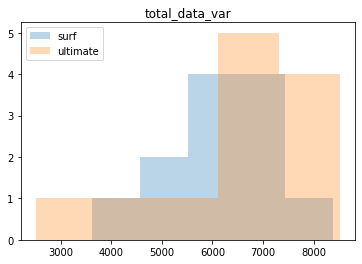

In [156]:
s= stat_table[stat_table['plan']=='surf']['total_data_var']
u= stat_table[stat_table['plan']=='ultimate']['total_data_var']
plt.hist(s,alpha=0.3, bins=5, label='surf')
plt.hist(u,alpha=0.3, bins=5, label='ultimate')
plt.legend()
plt.title('total_data_var')
plt.show()

### Conclusion

## We are working on continuous variables and it has a few things to take a look. In case of surf plan, the mean distribution of the different sources of data, differs from each one because it is affected by the variance and standard deviation. Happens the same with ultimate plan

<div class="alert alert-block alert-success">
<b>Success:</b> This step was done good!
</div>

## Step 4. Test the hypotheses

- The average profit from users of Ultimate and Surf calling plans differs.

The hypothesis is on the differnece between two populations means which are independent to each other and with different variance as we see. The null hypothesis is basically means equals and the alternative hypothesis is on the opposite; means are different.  

In [157]:
stat_profit= user_info.groupby(['tariff','user_id'])['total_profit'].agg(['mean']).reset_index()
stat_profit

,tariff,user_id,mean
0,surf,1001,28272.018000
1,surf,1002,13306.666667
2,surf,1003,116886.230000
3,surf,1004,53902.500000
4,surf,1005,17830.000000
...,...,...,...
478,ultimate,1482,70.000000
479,ultimate,1487,70.000000
480,ultimate,1490,41835.500000
481,ultimate,1493,70.000000


In [158]:
from scipy import stats as st
plan_surf= stat_profit[stat_profit['tariff']=='surf']['mean'].to_list()
plan_ultimate= stat_profit[stat_profit['tariff']=='ultimate']['mean'].to_list()
alpha=.05
results = st.ttest_ind(
    plan_surf,
    plan_ultimate,
    equal_var=False
)
print('p_value', results.pvalue)
if (results.pvalue<alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p_value 1.384898070055513e-30
We reject the null hypothesis


- The average profit from users in NY-NJ area is different from that of the users from other regions.

Now, we've got means from cities and wan to know if particularly certain region is different from the rest of regions. Nothe that the null hypothesis is that boths are the same and the alternative is not equal. In this case, we cannot asume that are paired examples, because are not the same size. so different populations with different samples.

In [159]:
group_table

,month,user_id,duration_min,calls,messages,mb,id,total_data,first_name,last_name,age,city,reg_date,tariff,churn_date
0,2018-01-01,1042,107.0,18.0,NaN,1855.0,8.0,NaN,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,NaT
1,2018-01-01,1077,276.0,42.0,37.0,10636.0,22.0,101.0,Chau,Webster,23,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-01-14,ultimate,NaT
2,2018-01-01,1185,171.0,23.0,NaN,6813.0,25.0,NaN,Loria,Freeman,47,"Louisville/Jefferson County, KY-IN MSA",2018-01-14,ultimate,NaT
3,2018-01-01,1196,273.0,42.0,23.0,8909.0,15.0,80.0,Noel,Dawson,46,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-14,ultimate,NaT
4,2018-01-01,1214,15.0,5.0,2.0,1316.0,4.0,11.0,Emil,Robles,34,"San Francisco-Oakland-Berkeley, CA MSA",2018-01-01,ultimate,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,2018-12-01,1466,NaN,NaN,41.0,NaN,NaN,NaN,Alphonse,Harmon,56,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-26,surf,2018-09-17
2250,2018-12-01,1467,NaN,NaN,77.0,NaN,NaN,NaN,Nickolas,Deleon,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-01-31,ultimate,2018-11-18
2251,2018-12-01,1491,NaN,NaN,43.0,NaN,NaN,NaN,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18
2252,2018-06-01,1311,NaN,NaN,NaN,1499.0,9.0,NaN,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",2018-06-27,ultimate,NaT


In [160]:
group_table['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          353
Los Angeles-Long Beach-Anaheim, CA MSA             131
Chicago-Naperville-Elgin, IL-IN-WI MSA              92
Dallas-Fort Worth-Arlington, TX MSA                 88
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     81
                                                  ... 
Omaha-Council Bluffs, NE-IA MSA                      3
El Paso, TX MSA                                      2
Raleigh-Cary, NC MSA                                 2
Jacksonville, FL MSA                                 2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 73, dtype: int64

Now we create a new column that extract only NY-NJ-PA capital letters to subtratc a sample and later study it

In [161]:
import nltk
from nltk.stem import WordNetLemmatizer

def lemmatize_purpose(city):
    word_lemma= WordNetLemmatizer()
    text=city
    words= nltk.word_tokenize(text)
    lemma=[word_lemma.lemmatize(w, pos = 'n') for w in words]
    return lemma

In [162]:
lemmatize_purpose('New York-Newark-Jersey City, NY-NJ-PA MSA')

['New', 'York-Newark-Jersey', 'City', ',', 'NY-NJ-PA', 'MSA']

In [163]:
def group_city(city):
    
    name=['York-Newark-Jersey','NJ-NY-PA']
    text= lemmatize_purpose(city)
    
    for i in name:
        if i in text:
            return 1
        else:
            return 0

<div class="alert alert-block alert-info">
<b>Remarks: </b> You can just return <span style="font-family: monospace"> i in next </span> instead of using if/else.
</div>

In [164]:
user_info['city']= group_table['city']
user_info['city_ny']= user_info['city'].apply(group_city)
user_info['city_ny'].value_counts()


0    1901
1     353
Name: city_ny, dtype: int64

In [165]:
stat_city= user_info.groupby(['city_ny','user_id'])['total_profit'].agg(['mean']).reset_index()
stat_city

,city_ny,user_id,mean
0,0,1000,70.000000
1,0,1001,28272.018000
2,0,1002,13306.666667
3,0,1004,44310.000000
4,0,1005,17830.000000
...,...,...,...
695,1,1488,41256.465000
696,1,1492,20.000000
697,1,1493,70.000000
698,1,1498,71050.000000


In [166]:
city_ny_nj=stat_city[stat_city['city_ny']==1]['mean'].to_list()
other_city=stat_city[stat_city['city_ny']==0]['mean'].to_list()
alpha=.05
result = st.ttest_ind(
    other_city,
    city_ny_nj
)
print('p_value', result.pvalue)
if (result.pvalue<alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p_value 0.37175982843416444
We can't reject the null hypothesis


<div class="alert alert-block alert-success">
<b>Success:</b> Step 4 was done perfectly!
</div>

### Conclusion

## The first hypothesis show us that we cannot accept the null hypothesis due to the lower p_value obtain compared to the statistical significance level selecred (0.01), so we reject that option. Even the statistical description allows us to realise that difference between these plans.
## The second hypothesis its not the same as the first one. The p_value is significally high and whatever is the significance level, we cannot reject the null hypothesis(0.05).